In [1]:
from video import video_read_local, video_read_global, video_read_with_flow, video_read_with_flow_slow

In [2]:
import json
# Read the JSONL file and extract video_paths into a list
video_paths = []
with open('/work/users/t/i/tis/VidMuse/egs/V2M20K/eval/test/data.jsonl', 'r') as file:
    for line in file:
        data = json.loads(line)
        video_paths.append(data['video_path'])


In [3]:
print(video_paths[0])

/work/users/t/i/tis/V2Music/preprocessing/data/video/9DF7rMJxvRo.mp4


In [ ]:
for v in video_paths[:3]:
    l, g = video_read_global(v, duration=30)
    print(l.shape, g.shape)

In [ ]:

for v in video_paths[:3]:
    vid, flow = video_read_with_flow(v)
    
    print(vid.shape, flow.shape)

fps=24.00, total_frames=721
video frames: 29
flow frames: 117
torch.Size([3, 29, 224, 224]) torch.Size([1, 29, 224, 224])
fps=25.00, total_frames=751
video frames: 29
flow frames: 117
torch.Size([3, 29, 224, 224]) torch.Size([1, 29, 224, 224])
fps=25.00, total_frames=751
video frames: 29
flow frames: 117
torch.Size([3, 29, 224, 224]) torch.Size([1, 29, 224, 224])


In [3]:
import numpy as np
import imageio
from IPython.display import Video
import torch

def show_video_tensor(video_tensor: torch.Tensor, fps: int = 25, filename: str = "/work/users/t/i/tis/sanity_check.mp4"):
    """
    Convert a [3, T, H, W] torch.Tensor to a video file and display it inline.
    
    Args:
      video_tensor: torch.Tensor of shape [3, T, H, W], values in [0,1] or [0,255]
      fps:         playback frame‐rate
      filename:    temporary filename to write (will be overwritten)
    Returns:
      IPython.display.Video object
    """
    # 1) Move channels to last dim and to CPU numpy: [T, H, W, 3]
    vid_np = video_tensor.permute(1, 2, 3, 0).cpu().numpy()
    
    # 2) Ensure uint8 in [0,255]
    if vid_np.dtype != np.uint8:
        vid_np = (np.clip(vid_np, 0, 1) * 255).astype(np.uint8)
    
    # 3) Write an MP4 with H.264
    imageio.mimwrite(filename, vid_np, fps=fps, codec='libx264', quality=8)
    
    # 4) Display inline
    return Video(filename, embed=True)

# Example usage:
# video_tensor, flow_tensor = video_read_with_flow("my.mp4", ...)
# show_video_tensor(video_tensor, fps=1)

In [20]:
#vid, flow = video_read_with_flow(video_paths[1])
vid, flow = video_read_with_flow(video_paths[1], duration=29)


fps=25.00, total_frames=751
video frames: 29
flow frames: 117


In [27]:
l, g = video_read_global(video_paths[1], duration=29, target_fps=1)

/work/users/t/i/tis/VidMuse/.venv/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [28]:
print(l.shape)

torch.Size([3, 29, 224, 224])


In [ ]:
print(l)

In [5]:
print(vid.shape, flow.shape)

torch.Size([3, 29, 224, 224]) torch.Size([1, 29, 224, 224])


In [9]:
print(vid)

tensor([[[[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]],

         [[ 0,  0,  0,  ...,  1,  1,  1],
          [ 0,  0,  0,  ...,  1,  1,  1],
          [ 0,  0,  0,  ...,  1,  1,  1],
          ...,
          [10, 10,  9,  ...,  1,  1,  1],
          [10, 10,  9,  ...,  0,  1,  1],
          [10, 10,  9,  ...,  0,  1,  1]],

         [[ 2,  2,  0,  ...,  0,  0,  0],
          [ 2,  2,  0,  ...,  0,  0,  0],
          [ 2,  2,  0,  ...,  0,  0,  0],
          ...,
          [ 1,  1,  2,  ...,  0,  0,  0],
          [ 2,  2,  0,  ...,  0,  0,  0],
          [ 2,  2,  0,  ...,  0,  0,  0]],

         ...,

         [[13, 13, 13,  ..., 24, 23, 23],
          [13, 13, 13,  ..., 24, 23, 23],
          [13, 13, 13,  ..., 24, 23, 23],
          ...,
          [22, 19, 17,  ..., 30, 28, 

In [10]:
show_video_tensor(vid, fps=25)

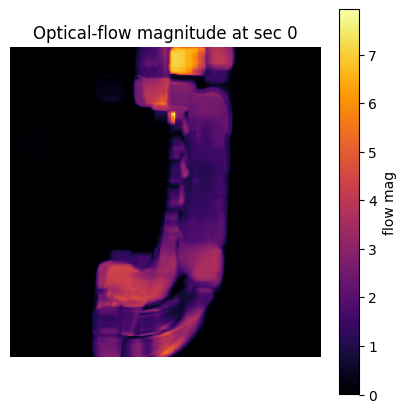

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1) move to CPU & numpy
# flow_tensor is [1, duration, H, W]
f = flow.squeeze(0).cpu().numpy()  # now [duration, H, W]

# 2) plot a single frame (e.g. at second t)
t = 0  # choose 0…duration-1
plt.figure(figsize=(5,5))
plt.imshow(f[t], cmap='inferno')
plt.title(f'Optical-flow magnitude at sec {t}')
plt.colorbar(label='flow mag')
plt.axis('off')
plt.show()

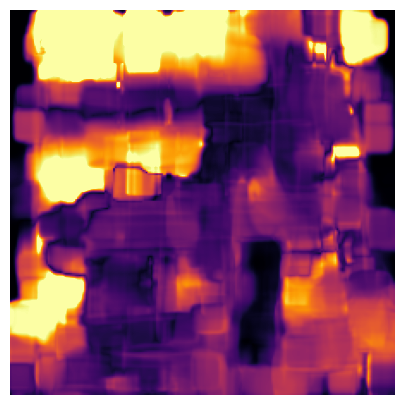

In [27]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# assume flow_tensor is a torch.Tensor of shape [1, 29, 224, 224]
f = flow.squeeze(0).cpu().numpy()  # → [29, 224, 224]

fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(f[0], cmap='inferno')
ax.axis('off')

def update(frame):
    im.set_array(f[frame])
    return [im]

ani = animation.FuncAnimation(
    fig,
    update,
    frames=f.shape[0],
    interval=250,
    blit=True
)

HTML(ani.to_jshtml())

In [1]:
import sys
import os

# Add the parent folder of 'audiocraft' to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))


ModuleNotFoundError: No module named 'audiocraft.solver'

In [3]:
print(sys.path)

['/nas/longleaf/home/tis/.local/share/uv/python/cpython-3.9.21-linux-x86_64-gnu/lib/python39.zip', '/nas/longleaf/home/tis/.local/share/uv/python/cpython-3.9.21-linux-x86_64-gnu/lib/python3.9', '/nas/longleaf/home/tis/.local/share/uv/python/cpython-3.9.21-linux-x86_64-gnu/lib/python3.9/lib-dynload', '', '/work/users/t/i/tis/VidMuse/.venv/lib/python3.9/site-packages', '__editable__.vidmuse-0.1.0.finder.__path_hook__', '/work/users/t/i/tis/VidMuse', '/work/users/t/i/tis/VidMuse/.venv/lib/python3.9/site-packages/setuptools/_vendor', '/tmp/tmp_h3t80xx']


In [ ]:
# Test train dataloader
for batch in solver.dataloaders['train']:
    print(f"Batch: {batch}")
    break

# Checkpoint Saving (not used)

In [ ]:
import torch
import os
import torch
ckpt = torch.load("/work/users/t/i/tis/VidMuse/model/state_dict.bin")
opencv-python
print(type(ckpt['best_state']))

# Paths
input_path = "/work/users/t/i/tis/VidMuse/model/state_dict.bin"
output_path = "/work/users/t/i/tis/VidMuse/model/state_dict_fixed.bin"

# Load the original checkpoint
ckpt = torch.load(input_path)


wrapped_ckpt = {'best_state': {'model': ckpt['best_state']}}

# Save the fixed checkpoint
os.makedirs(os.path.dirname(output_path), exist_ok=True)
torch.save(wrapped_ckpt, output_path)
print(f"✅ Saved fixed checkpoint to: {output_path}")

✅ Saved fixed checkpoint to: /work/users/t/i/tis/VidMuse/model/state_dict_fixed.bin
